<a href="https://colab.research.google.com/github/Imran1hp/Waste-Cassification/blob/main/Waste_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets --upgrade --quiet

In [2]:
import os
import torch

In [3]:
import opendatasets as od

In [4]:
data_url ="https://www.kaggle.com/datasets/wasifmahmood01/custom-waste-classification-dataset"
od.download(data_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: imranlaskar123
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/wasifmahmood01/custom-waste-classification-dataset


100%|██████████| 5.39G/5.39G [01:09<00:00, 83.7MB/s]


In [5]:
os.listdir()


['.config', 'custom-waste-classification-dataset', 'sample_data']

In [6]:
from pathlib import Path
folder_name = 'wastes'
data_path = Path("custom-waste-classification-dataset/")
img_path = data_path/folder_name
img_path

PosixPath('custom-waste-classification-dataset/wastes')

In [7]:
def walk_through_data(dir_path):
  for dirpath ,dirnames ,filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath} ")

In [8]:
walk_through_data(img_path)

There are 2 directories and 0 images in custom-waste-classification-dataset/wastes 
There are 9 directories and 0 images in custom-waste-classification-dataset/wastes/test 
There are 0 directories and 213 images in custom-waste-classification-dataset/wastes/test/battery waste 
There are 0 directories and 218 images in custom-waste-classification-dataset/wastes/test/automobile wastes 
There are 0 directories and 105 images in custom-waste-classification-dataset/wastes/test/light bulbs 
There are 0 directories and 223 images in custom-waste-classification-dataset/wastes/test/organic waste 
There are 0 directories and 308 images in custom-waste-classification-dataset/wastes/test/metal waste 
There are 0 directories and 329 images in custom-waste-classification-dataset/wastes/test/plastic waste 
There are 0 directories and 256 images in custom-waste-classification-dataset/wastes/test/glass waste 
There are 0 directories and 313 images in custom-waste-classification-dataset/wastes/test/E-wa

In [9]:
train_dir = img_path/"train"
test_dir = img_path/"test"

In [10]:
train_dir , test_dir

(PosixPath('custom-waste-classification-dataset/wastes/train'),
 PosixPath('custom-waste-classification-dataset/wastes/test'))

In [11]:
img_path

PosixPath('custom-waste-classification-dataset/wastes')

##Opena random image using file path

Image path custom-waste-classification-dataset/wastes/train/paper waste/paper waste (2378).jpg
Image Class: paper waste
Image Height: 349
Image width: 459


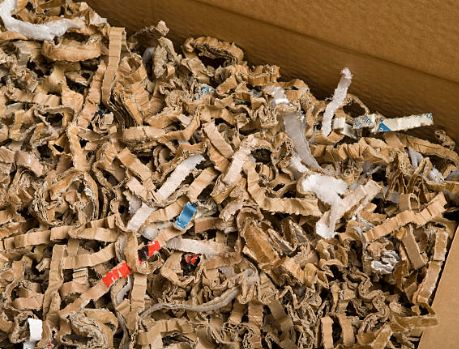

In [12]:
import random
from  PIL import Image
random.seed(42)
img_path_list = list(img_path.glob("*/*/*.jpg"))
rand_img_path = random.choice(img_path_list)
class_name = rand_img_path.parent.stem
img = Image.open(rand_img_path)
print(f"Image path {rand_img_path}")
print(f"Image Class: {class_name}")
print(f"Image Height: {img.height}")
print(f"Image width: {img.width}")
img

(np.float64(-0.5), np.float64(458.5), np.float64(348.5), np.float64(-0.5))

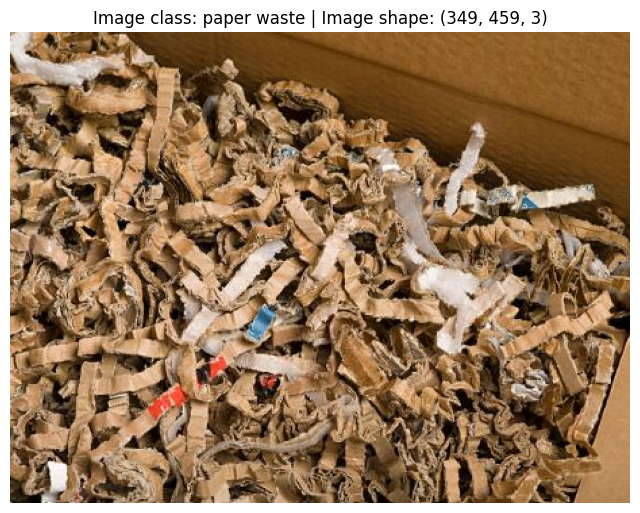

In [13]:
import matplotlib.pyplot as plt
import numpy as np


img_array = np.array(img)

plt.figure(figsize=(8,7))

plt.imshow(img_array)
plt.title(f"Image class: {class_name} | Image shape: {img_array.shape}")
plt.axis(False)


## Make the transform fucntion to tramsform the image

In [14]:
from torchvision import datasets , transforms

train_transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip( p=0.5)

])
test_transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
])
train_transform , test_transform

(Compose(
     Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
     ToTensor()
     RandomHorizontalFlip(p=0.5)
 ),
 Compose(
     Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
     ToTensor()
 ))

In [15]:
trans_img = train_transform(img)
trans_img

tensor([[[0.8510, 0.8745, 0.7843,  ..., 0.5608, 0.5451, 0.5608],
         [0.9020, 0.8392, 0.7255,  ..., 0.5529, 0.5608, 0.5569],
         [0.8941, 0.7490, 0.6039,  ..., 0.5608, 0.5608, 0.5608],
         ...,
         [0.2471, 0.4588, 0.5569,  ..., 0.7137, 0.7137, 0.7137],
         [0.2118, 0.3569, 0.4824,  ..., 0.7020, 0.7059, 0.7020],
         [0.1882, 0.1569, 0.1176,  ..., 0.6902, 0.6902, 0.6863]],

        [[0.8078, 0.8431, 0.6471,  ..., 0.3765, 0.3608, 0.3765],
         [0.8784, 0.8039, 0.5804,  ..., 0.3686, 0.3765, 0.3725],
         [0.8667, 0.6863, 0.4549,  ..., 0.3765, 0.3765, 0.3765],
         ...,
         [0.1765, 0.3608, 0.4431,  ..., 0.5412, 0.5412, 0.5373],
         [0.1490, 0.2824, 0.3922,  ..., 0.5294, 0.5333, 0.5294],
         [0.1412, 0.1098, 0.0824,  ..., 0.5176, 0.5216, 0.5216]],

        [[0.7529, 0.8157, 0.5020,  ..., 0.1647, 0.1490, 0.1647],
         [0.8549, 0.7490, 0.4157,  ..., 0.1569, 0.1647, 0.1608],
         [0.8353, 0.6235, 0.2980,  ..., 0.1647, 0.1647, 0.

(np.float64(-0.5), np.float64(63.5), np.float64(63.5), np.float64(-0.5))

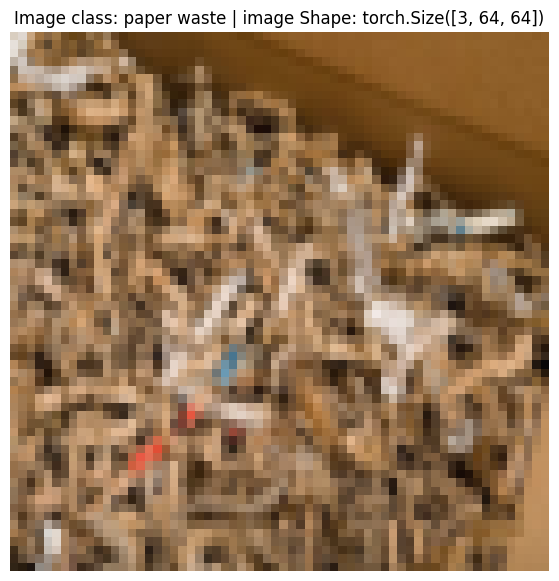

In [16]:

plt.figure(figsize=(10,7))
plt.imshow(trans_img.permute(1,2,0).numpy())
plt.title(f"Image class: {class_name} | image Shape: {trans_img.shape}")
plt.axis(False)

##Loading the image Data using ImageFolder Madule

In [17]:
train_dir , test_dir

(PosixPath('custom-waste-classification-dataset/wastes/train'),
 PosixPath('custom-waste-classification-dataset/wastes/test'))

In [18]:
from torchvision.datasets import ImageFolder
train_data = ImageFolder(root = train_dir , transform = train_transform ,target_transform = None)
test_data = ImageFolder(root = test_dir , transform = test_transform , target_transform = None)



In [19]:
train_data , test_data

(Dataset ImageFolder
     Number of datapoints: 9214
     Root location: custom-waste-classification-dataset/wastes/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
                RandomHorizontalFlip(p=0.5)
            ),
 Dataset ImageFolder
     Number of datapoints: 2308
     Root location: custom-waste-classification-dataset/wastes/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [20]:
class_names = train_data.classes
class_names

['E-waste',
 'automobile wastes',
 'battery waste',
 'glass waste',
 'light bulbs',
 'metal waste',
 'organic waste',
 'paper waste',
 'plastic waste']

In [21]:
class_name_idx = train_data.class_to_idx
class_name_idx

{'E-waste': 0,
 'automobile wastes': 1,
 'battery waste': 2,
 'glass waste': 3,
 'light bulbs': 4,
 'metal waste': 5,
 'organic waste': 6,
 'paper waste': 7,
 'plastic waste': 8}

In [22]:
len(train_data) ,len(test_data)

(9214, 2308)

(np.float64(-0.5), np.float64(63.5), np.float64(63.5), np.float64(-0.5))

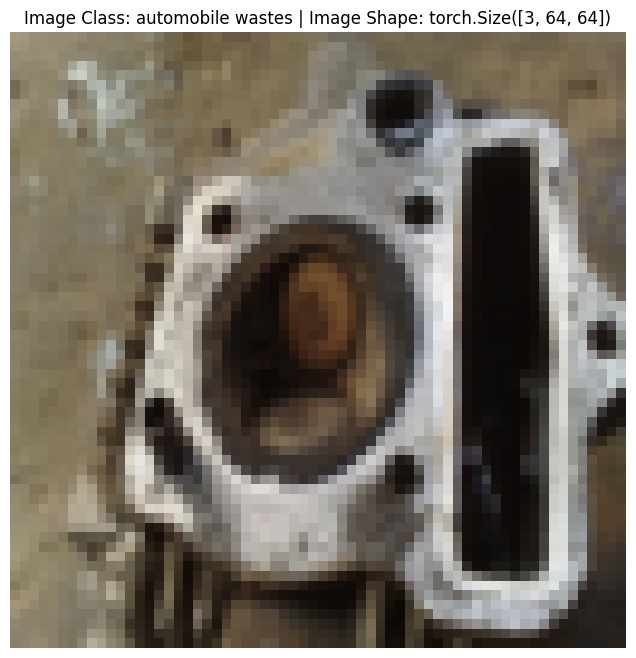

In [23]:
import random
rand_sample = random.choice(train_data)
load_img , load_class_name = rand_sample[0],rand_sample[1]
plt.figure(figsize=(10,8))
plt.imshow(load_img.permute(1,2,0).numpy())
plt.title(f"Image Class: {class_names[load_class_name]} | Image Shape: {load_img.shape}")
plt.axis(False)

## Load and Batch the data using DataLoader Madule

In [24]:
from torch.utils.data import DataLoader
import os
BATCH_SIZE =32
NUM_WORKERS = os.cpu_count()

train_dataloader = DataLoader(dataset = train_data , batch_size = BATCH_SIZE , shuffle = True , num_workers= NUM_WORKERS)
test_dataloader = DataLoader(dataset = test_data , batch_size = BATCH_SIZE , shuffle = True , num_workers = NUM_WORKERS)

train_dataloader , test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7c12ce06b350>,
 <torch.utils.data.dataloader.DataLoader at 0x7c11c9dbc920>)

In [25]:
len(train_dataloader) ,len(test_dataloader)

(288, 73)

In [26]:
len(train_data)/32 , len(test_data)/32

(287.9375, 72.125)

In [27]:
train_feature_batch , train_label_batch = next(iter(train_dataloader))
train_feature_batch.shape , train_label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [28]:
train_feature_batch[31] , train_label_batch[31]

(tensor([[[0.3529, 0.3725, 0.3961,  ..., 0.3373, 0.3137, 0.3176],
          [0.3608, 0.3765, 0.4078,  ..., 0.3255, 0.3216, 0.4000],
          [0.3608, 0.3765, 0.4275,  ..., 0.3725, 0.4118, 0.4392],
          ...,
          [0.4353, 0.5412, 0.4784,  ..., 0.4706, 0.4745, 0.4784],
          [0.4863, 0.5529, 0.5216,  ..., 0.4706, 0.4784, 0.4784],
          [0.5333, 0.5725, 0.5843,  ..., 0.4706, 0.4784, 0.4784]],
 
         [[0.2902, 0.3098, 0.3373,  ..., 0.3412, 0.2941, 0.2588],
          [0.2980, 0.3137, 0.3490,  ..., 0.3294, 0.3020, 0.3412],
          [0.2980, 0.3137, 0.3725,  ..., 0.3451, 0.3608, 0.3686],
          ...,
          [0.3922, 0.5255, 0.4510,  ..., 0.4667, 0.4706, 0.4745],
          [0.4510, 0.5294, 0.4824,  ..., 0.4667, 0.4745, 0.4745],
          [0.5020, 0.5451, 0.5333,  ..., 0.4667, 0.4745, 0.4745]],
 
         [[0.2314, 0.2471, 0.2745,  ..., 0.3294, 0.2745, 0.1725],
          [0.2392, 0.2471, 0.2941,  ..., 0.3255, 0.2667, 0.2706],
          [0.2392, 0.2510, 0.3216,  ...,

##Plot random imgage

In [29]:
import torch
def plot_rand_img(data:torch.utils.data.Dataset , n:int,
                  classes:list , seed:int = None ):


  if (n >6):
    n = 6
    print("For display perpass we are making the n = 6")
  if seed:
    random.seed(seed)



  rand_idx = random.sample(range(len(data)), k =n)

  plt.figure(figsize=(16,7))

  for i , targ_idx , in enumerate(rand_idx):
    targ_img , targ_label = data[targ_idx][0],data[targ_idx][1]

    img_premute = targ_img.permute(1,2,0).numpy()

    plt.subplot(1, n ,i+1)

    plt.imshow(img_premute)

    plt.title(f"image class: {classes[targ_label]}")
    plt.axis(False)


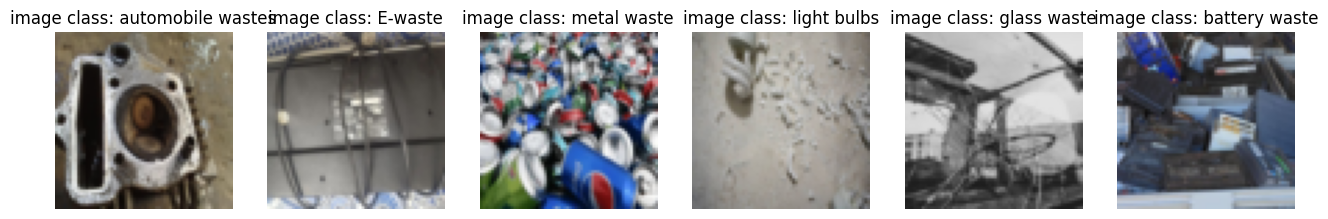

In [30]:
plot_rand_img(data=train_data , n = 6 , classes = class_names , seed=42)

##MAKE frist model With TinyVGG model architecture

In [31]:
from torch import nn

class TinyVGGModel(nn.Module):


  def __init__(self , input_shape , output_shape , hidden_units):
    super().__init__()
    self.conv_block1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape , out_channels = hidden_units , kernel_size = 3 , stride = 1 , padding =0 ),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units , out_channels = hidden_units  , kernel_size = 3 ,stride = 1 , padding = 0 ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2 , stride = 2)
    )

    self.conv_block2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units , out_channels = hidden_units , kernel_size = 3 , stride = 1 , padding =0 ),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units , out_channels = hidden_units , kernel_size = 3 , stride = 1 , padding = 0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2 , stride = 2 )

    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*13*13 , out_features = output_shape ),


    )

  def forward(self , x):
    return self.classifier(self.conv_block2(self.conv_block1(x)))

In [32]:
device = ''
if torch.cuda.is_available():
  device = 'cuda'
else:
  device = 'cpu'

In [33]:
torch.cuda.is_available()

True

In [34]:
torch.manual_seed(42)
model_0 = TinyVGGModel(input_shape = 3,
                       hidden_units = 10 ,
                       output_shape = len(class_names)).to(device)

In [35]:
train_feature_batch.shape , train_label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [36]:
model_0(train_feature_batch.to(device))

tensor([[ 9.7255e-03, -1.4677e-03,  1.0532e-02,  8.0702e-03, -1.7911e-03,
         -2.8327e-03, -1.4695e-02,  7.4734e-02,  1.2911e-02],
        [ 8.2298e-03, -1.2085e-03,  5.9592e-03,  1.7825e-03,  1.8784e-03,
         -3.5083e-03, -1.3392e-02,  7.5167e-02,  1.5440e-02],
        [ 8.2867e-03, -1.5999e-03,  1.0815e-02,  7.4433e-03, -1.3319e-03,
         -1.7516e-03, -1.6579e-02,  7.8101e-02,  1.5015e-02],
        [ 9.9248e-03, -2.8674e-03,  9.2812e-03,  4.9107e-03, -3.0049e-04,
         -3.1146e-03, -1.4213e-02,  7.8243e-02,  1.3907e-02],
        [ 6.7198e-03,  2.8644e-03,  9.5494e-03,  1.0073e-02, -2.5058e-03,
         -3.2812e-03, -1.5263e-02,  7.0162e-02,  1.2423e-02],
        [ 1.0098e-02, -3.7112e-04,  1.0033e-02,  6.3676e-03, -7.6682e-04,
         -2.1851e-03, -1.6466e-02,  7.5606e-02,  1.3182e-02],
        [ 9.4037e-03, -1.7014e-03,  8.6473e-03,  4.4620e-03, -1.8004e-03,
         -2.1707e-03, -1.6847e-02,  7.0684e-02,  1.1510e-02],
        [ 9.6955e-03, -1.9310e-03,  9.5964e-03, 

In [37]:
10*13*13

1690

In [38]:
try:
  from torchinfo import summary
except:
  !pip install torchinfo --quiet
from torchinfo import summary

summary(model_0 ,input_size=[1,3,64,64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGGModel                             [1, 9]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia